In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.layers import Reshape
from keras.optimizers import SGD
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [3]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [4]:
!unzip Cat_dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [5]:
testing_path= '/content/drive/MyDrive/test_set/test_set'
training_path = '/content/drive/MyDrive/training_set/training_set'

In [6]:
# to bring the data into lower range [0,1]
data_in_lower_range = ImageDataGenerator(rescale=1/255.)

In [7]:
trainiing_set = data_in_lower_range.flow_from_directory(training_path,target_size=(227,227),batch_size=32,class_mode="categorical")
testing_set  = data_in_lower_range.flow_from_directory(testing_path,target_size=(227,227),batch_size=32,class_mode="categorical")

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


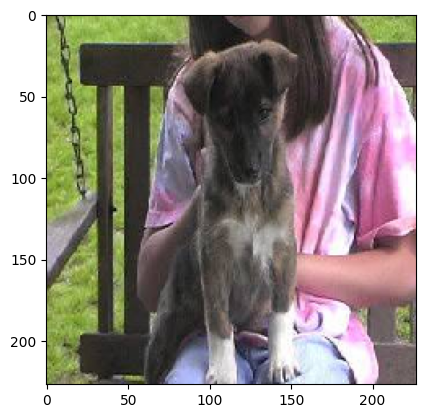

In [8]:
training_data = next(trainiing_set)

plt.imshow(training_data[0][31])

In [14]:
model = Sequential()
model.add(Conv2D(96,(11,11),strides=(4,4),input_shape =(227,227,3),activation="relu")) # Conv 1
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2))) # Pool 1

model.add(Conv2D(256,(5,5),strides=(1,1),padding=("same"),activation="relu")) # Conv 2
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2))) # Pool 2

model.add(Conv2D(384,(3,3),strides=(1,1),padding=("same"),activation="relu")) # Conv 3


model.add(Conv2D(384,(3,3),strides=(1,1),padding=("same"),activation="relu")) #Conv 4


model.add(Conv2D(256,(3,3),strides=(1,1),padding=("same"),activation="relu")) #Conv 5
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2))) #Pool 5


model.add(Flatten())

# Dense layers
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.6))  # Dropout to reduce overfitting

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.6))  # Dropout to reduce overfitting

# Output layer (number of units should be equal to the number of classes)
model.add(Dense(2, activation='softmax'))
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()





Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │           8,194 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,289,538 (222.36 MB)

 Trainable params: 58,289,538 (222.36 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.fit(trainiing_set,validation_data=testing_set,epochs=50)


Epoch 1/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 56s 204ms/step - accuracy: 0.4980 - loss: 0.6938 - val_accuracy: 0.5556 - val_loss: 0.6900
Epoch 2/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 51s 198ms/step - accuracy: 0.5080 - loss: 0.6939 - val_accuracy: 0.6085 - val_loss: 0.6892
Epoch 3/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 81s 193ms/step - accuracy: 0.5298 - loss: 0.6915 - val_accuracy: 0.5596 - val_loss: 0.6831
Epoch 4/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 82s 193ms/step - accuracy: 0.5701 - loss: 0.6804 - val_accuracy: 0.6204 - val_loss: 0.6697
Epoch 5/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 48s 186ms/step - accuracy: 0.5844 - loss: 0.6717 - val_accuracy: 0.6337 - val_loss: 0.6512
Epoch 6/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 49s 191ms/step - accuracy: 0.6350 - loss: 0.6474 - val_accuracy: 0.5606 - val_loss: 0.6938
Epoch 7/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 81s 187ms/step - accuracy: 0.6467 - loss: 0.6248 - val_accuracy: 0.6070 - val_loss: 0.6587
Epoch 8/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 50s 194ms/step - accuracy: 0.6764 - loss: 0

In [16]:
model.save('/content/drive/MyDrive/Cat_Dog_Alexnet_Model.h5')

In [19]:
model = load_model('/content/drive/MyDrive/Cat_Dog_Alexnet_Model.h5')
image_path = '/content/drive/MyDrive/360_F_336196621_40Uqvq8BYUIN9IPZB8F6P4smy1cYo4lj.jpg'
test_image = image.load_img(image_path,target_size=(227,227))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
test_image.shape
result = model.predict(test_image/255.0)
predicted_class = np.argmax(result, axis=1)  # Get the index of the class with the highest probability

# Assuming class 0 is 'Cat' and class 1 is 'Dog'
if predicted_class == 0:
    prediction = 'Cat'
else:
    prediction = 'Dog'
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
Cat
